In [1]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame({'a':[5,2,3,5],'b':[4,5,6,7]})

## 导入与输出
1.1、通过字典直接创建

1.2、通过本地数据读取创建

1.3、输出DF

### 通过字典直接创建

In [ ]:
df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

### 基于DF再构DF

In [ ]:
pd.DataFrame(df1,columns=['省份', '人口出生率(‰)', '人口死亡率(‰)'])

### 通过本地数据读取

In [ ]:
df2 = pd.read_excel('xxx.xlsx')
df2 = pd.read_csv('./xxx.csv') # 当前目录下的文件
df2 = pd.read_table(filename) # 从限定分隔符的文本文件导入数据
df2 = pd.read_sql(query,connection_object) # 从SQL表/库导入数据
df2 = pd.read_json(json_string) # 从JSON格式的字符串导入数据
df2 = pd.read_html(url) # 解析URL，字符串或者HTML文件，抽取其中的TABLES表格

### 导出数据

In [ ]:
df.to_csv()
df.to_excel()
df.to_sql(table_name,connection_object)
df.to_json()

s=pd.ExcelWriter('xxx.xlsx',index=False) # 将多个数据集写入到同一个工作簿的多个sheet中
df1.to_excle(s,sheet_name='k')
s.save()

## 数据查探

In [ ]:
# 查看DF的行列数
df1.shape
# 查看字段属性名称
df1.columns
# 查看属性的数据类型
df1.dtypes
# 查看DF的index
df1.index
# 查看数据统计值(count,mean,std:标准差,min,max,25%，75%)
df1.describe()
# 查看索引、数据类型、空值和内存信息
df1.info()
# 查看DF的头尾数据行
df1.head(n)
df1.tail(n)

# 查看数据缺失
7 in df1 ##判断是否存在指定元素
df1.isnull() ##批量判断空值，返回boolean类型的统计表。
df1.notnull()
df1.isnull().sum() ##统计缺失值的个数

# 查看col_name字段的重复数据（index True/False)
df1['a'].duplicated()
# 指定属性，按值域统计每个值的出现次数
df1['a'].value_counts()

## 数据选取

### 已知行列号

In [ ]:
#3.1.1、.iloc[:,:]（操作对象为int:行列号）（行号必不可少）
    df.iloc[0] # 选取第0行的数据
    df.iloc[0,0] # 返回第0列的第0个元素
    df.iloc[0:2,:] # 返回第0、1行
    
#3.1.2-1、切片取数1：开始默认为0，结束默认为最后一位，步长默认为1.左闭右开
    df1[::]
#3.1.2-2、切片取数2：步长为-1取反
    df1[4:0:-1] #4,3,2,1
#3.1.2-3、切片取数3：开始/结束为-1则从最后一个开始
    df1[-1:-5:-1] #end1st,end2st,end3st,end4st

### 已知索引名或col名

In [ ]:
#3.2.1、.loc[] (操作对象为Index/col_name)（索引名必不可少）
    df.loc['index_one'] #按索引选取数据
    df1.loc[0,['a','b']]

#3.2.2、切片选取指定列名的全部数据
    df1[['columns_name1','columns_name2']]
#3.2.3、切片选取指定列名的部分数据
    df1[~(df1['columns_name1'] == x) & (df1['columns_name2'] > 10)]

### 通过数据类型选取数据行

In [ ]:
#选取指定数据类型的列数据
    df1.select_dtypes(include=['int64','object'])
#选取排除指定数据类型的列数据
    df1.select_dtypes(exclude=['int64','object'])

### 基于数据项，按条件选取行（str_value)

In [ ]:
#选取含有x开头的字符串数据项的数据行
    df1[df1['col_name'].str.startswith('x')]
#选取含有x结尾的字符串数据项的数据行
    df1[df1['col_name'].str.endswith('x')]
#选取包含有x的字符串数据项的数据行
    df1[~df1['col_name'].str.contains('x')]

## 数据处理

### 常用数据处理

#### 空值处理

In [ ]:
# 删除所有包含空值的数据行/列
df.dropna()
df.dropna(axis=1)
# 用X代替DF对象中所有的空值
df.fillna(value=X)
df['col_name'].fillna(X)

#### 基于值的数据项替换

In [ ]:
# ⽤‘one’代替所有等于1的值
s.replace(1,'one') 
# ⽤'one'代替1，⽤'three'代替3
s.replace([1,3],['one','three']) 
# 更换掉符合条件的所有数据项
df1[df1 < 0] = 0

#### 更改columns及index

In [ ]:
# 批量修改列名/索引
df.rename(columns=lambda x:x+1,index=lambda x:x+1) 
obj.reindex(['a', 'b','c', 'd', 'e'], fill_value = 0) #fill_value=0:填充空值
# 选择性更改列名/索引
df.rename(columns={'old_name':'new_ name'}f,index={'old_index':'new_ index'}) 

# 将某个字段设为索引，可接受列表参数，即设置多个索引
df.set_index('column_one') 
？# 将索引设置为col1字段，并将索引新设置为0,1,2...
df.reset_index("col1") #drop=True:序号范化

#### 其他

In [ ]:
#1、 修改值的数据类型
    df2['col_name'].astype(float)
#2、去重
    df1.drop_duplicates()
#3、转置
    df1.T
#4、删除
    df1.drop('b',axis=1) #index,axis = 0;colunm,axis = 1
    df1.drop([1,2,3]) #批量删除 Index/colunm 为1，2，3 的数据 行/列.

### 高级应用

#### 数据排序

In [ ]:
#1、排序
    # 对前5条数据进⾏索引排序
    df.sort_index().loc[:5] 
    # 按照列col1排序数据
    df.sort_values(col1) # 默认升序排列
    df.sort_values(col2,ascending=False) # 按照列col1降序排列数据
    # 先按列col1升序排列，后按col2降序排列数据
    df.sort_values([col1,col2],ascending=[True,False]) 

#### 数据分组

In [ ]:
#2、分组
    # 返回⼀个按列col进⾏分组的Groupby对象
    df.groupby(col) 
    # 返回⼀个按多列进⾏分组的Groupby对象
    df.groupby([col1,col2]) 
    # col_name1:分组字段；col_name2:聚合字段
    df1.groupby(['col_name1',])['col_name2'][.sum()/mean()] 

#### 透视

In [ ]:
#3、透视
    # 创建⼀个按列col1进⾏分组，计算col2的最⼤值和col3的最⼤值、最⼩值的数据透视表
    df.pivot_table(index=col1,values=[col2,col3],aggfunc={col2:max,col3:[max,min]}) 

#### 函数化处理

In [ ]:
#4、函数化处理
    #apply函数1:lambda函数处理 指定属性列中的值批量处理
    df1['col_name'] = df1['col_name'].apply(lambda x:1 if x=='k' else 0)
    df2['col_name'] = df2['col_name'].apply(lambda x:x+'k') #将指定属性列中所有值追加str:k
    #apply函数2:自定义函数处理
    def f(x):
        return 1 if x=='k' else 0
    df1['col_name'] = df1['col_name'].apply(f)
    
    # 对DataFrame中的每⼀列应⽤函数np.mean
    data.apply(np.mean) 
    # 对DataFrame中的每⼀⾏应⽤函数np.max
    data.apply(np.max,axis=1) 

### 数据合并

In [ ]:
# 在df1尾部追加df2（按行合并）
df1.append(df2) 

# 将df1,df2按列合并
    #指定连接的方式 join(outer,inner) axis=1:列/0:行 keys:指定行索引 ignore_index:消除行索引
pd.concat([df1,df2],axis=0,join='inner',keys=['01','02'],ignore_index=True)    

# 对df1和df2合并；依据col1；how指定匹配的方式，outer表示匹配上的放在上面，没有匹配上的保留在下面）
pd.merge(df1,df2,on='col1',how='outer')

In [29]:
df1 = pd.DataFrame({'a':[1,2,3],'b':[7,8,9]})
df2 = pd.DataFrame({'a':[4,5,6],'b':[10,11,12]})
print(df1)
print(df2)
pd.merge(df1,df2,on='b',how='outer')

   a  b
0  1  7
1  2  8
2  3  9
   a   b
0  4  10
1  5  11
2  6  12


,a_x,b,a_y
0,1.0,7,NaN
1,2.0,8,NaN
2,3.0,9,NaN
3,NaN,10,4.0
4,NaN,11,5.0
5,NaN,12,6.0


## Pandas数据可视化
- 依赖函数
    - pd.DataFrame,plot
    - pd.Series.plot
    
- 图表样式
    - 1、折线图 圆滑折线图
    - 2、条形图 堆积条形图 水平堆积条形图
    - 3、直方图 分面直方图
    - 4、箱型图
    - 5、面积图 堆积面积图
    - 6、散点图
    - 7、单组饼图 多组饼图
    - 8、 分面图
    - 9、 hexbin图 
    - 10、 autocorrelation_plot图 
    - 11、子图 子图任意排列  

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from jupyterthemes import jtplot
jtplot.style(theme='solarizedl') #grade3 oceans16 chesterish monokai solarizedl solarizedd onedork
%matplotlib inline

print('DataFrame:',dir(pd.DataFrame.plot))
print('--------------------------------------')
print('Series:',dir(pd.Series.plot))

DataFrame: ['__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_all_kinds', '_common_kinds', '_constructor', '_dataframe_kinds', '_dir_additions', '_dir_deletions', '_get_call_args', '_hidden_attrs', '_kind_aliases', '_reset_cache', '_series_kinds', 'area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']
--------------------------------------
Series: ['__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', 

### 折线图

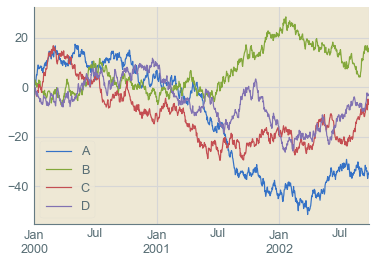

In [10]:
# 折线图
np.random.seed(0)#使得每次生成的随机数相同
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()#累加
ax = df.plot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')

### 圆滑折线图

<AxesSubplot:ylabel='Density'>

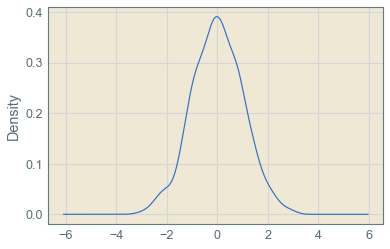

In [37]:
# 圆滑折线图
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

### 条形图

<AxesSubplot:>

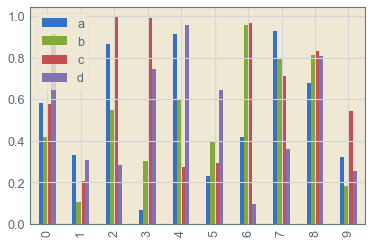

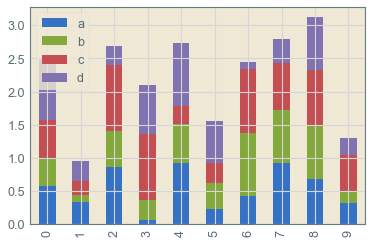

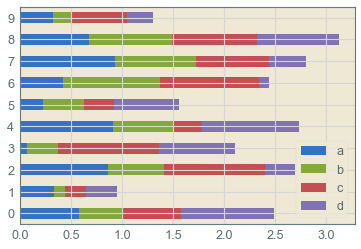

In [11]:
# 条形图
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()
# 堆积条形图
df2.plot.bar(stacked=True)
# 水平堆积条形图
df2.plot.barh(stacked=True)

### 直方图

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplo

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

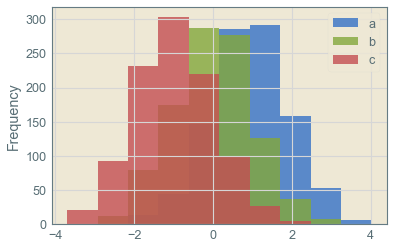

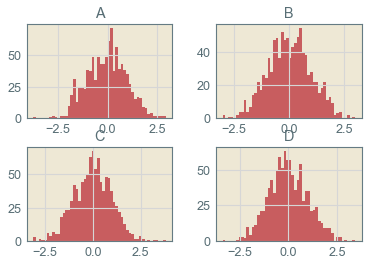

In [13]:
# 直方图
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
df4.plot.hist(alpha=0.8)

# 分面直方图
df.diff().hist(color="r", alpha=0.9, bins=50)

### 箱型图

<AxesSubplot:>

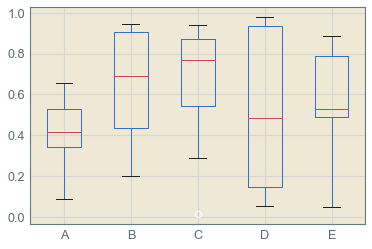

In [15]:
# 箱型图
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box()

### 面积图

<AxesSubplot:>

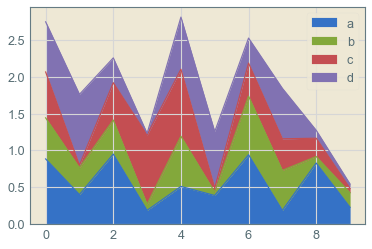

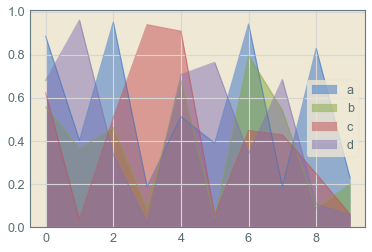

In [17]:
# 面积图
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.plot.area()
# 堆积面积图
df.plot.area(stacked=False)

### 散点图

<AxesSubplot:xlabel='c', ylabel='d'>

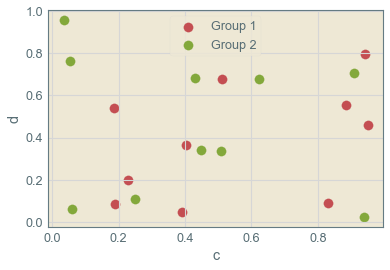

In [18]:
# 散点图
ax = df.plot.scatter(x="a", y="b", color="r", label="Group 1",s=90)
df.plot.scatter(x="c", y="d", color="g", label="Group 2", ax=ax,s=90)

### 饼图

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplo

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

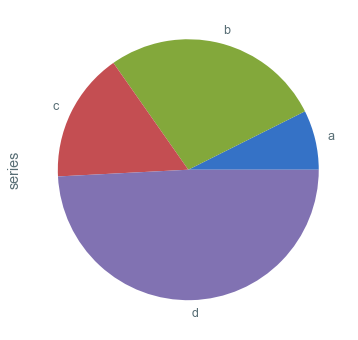

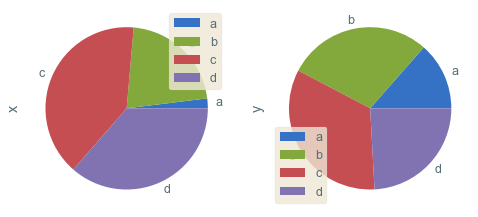

In [19]:
# 单组饼图 多组饼图
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6))
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)
df.plot.pie(subplots=True, figsize=(8, 4))

### 分面图

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplo

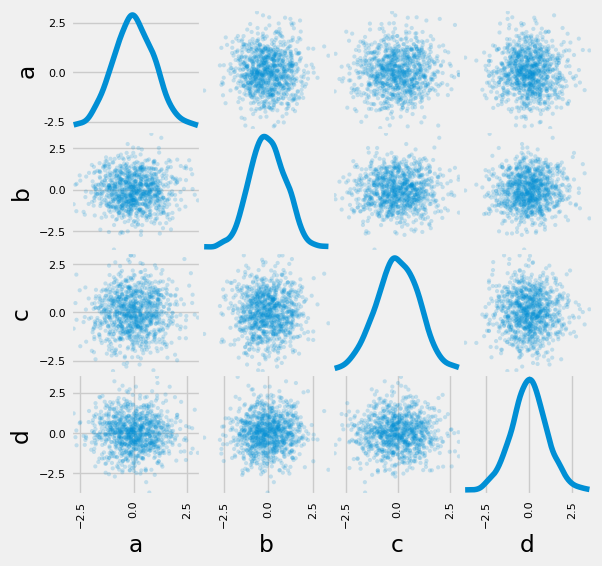

In [20]:
# 分面图
import matplotlib as mpl
mpl.rc_file_defaults()
plt.style.use('fivethirtyeight')
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

### hexbin图

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='a', ylabel='b'>

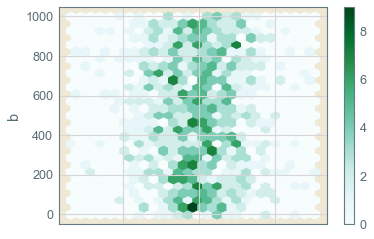

In [35]:
# hexbin图
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x="a", y="b", gridsize=25)

### autocorrelation_plot图

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

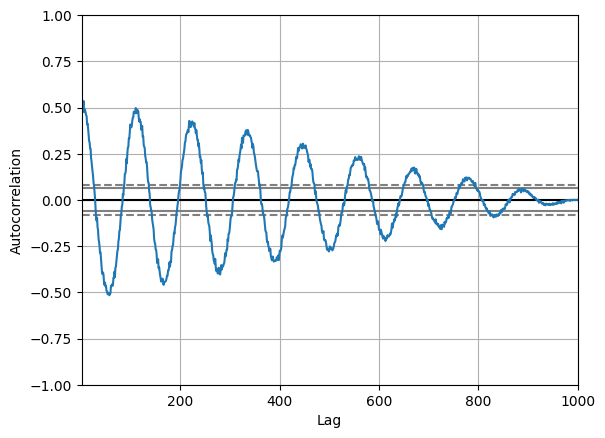

In [24]:
# autocorrelation_plot图
from pandas.plotting import autocorrelation_plot
plt.figure();
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
autocorrelation_plot(data)

### 子图

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

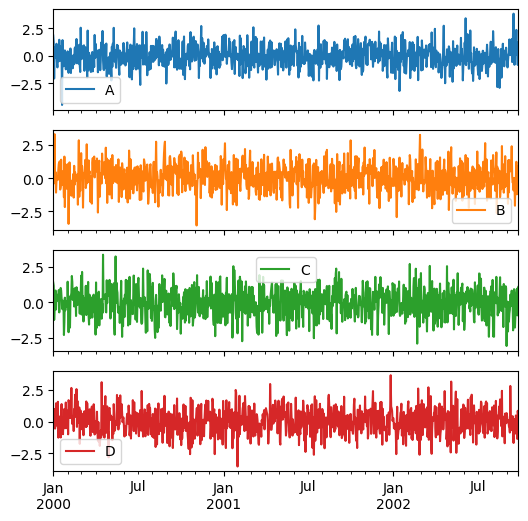

In [26]:
# 子图
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df.plot(subplots=True, figsize=(6, 6))

### 子图任意排列

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplo

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

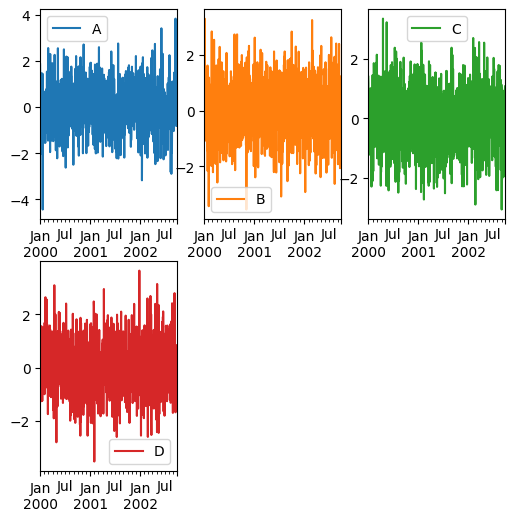

In [27]:
# 子图任意排列
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplo

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

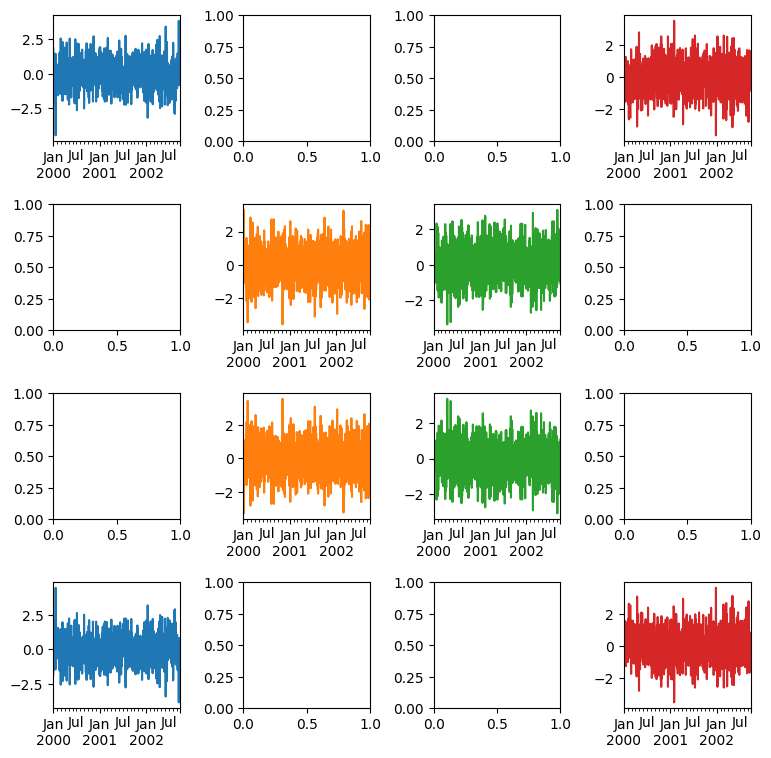

In [28]:
# 子图任意排列
fig, axes = plt.subplots(4, 4, figsize=(9, 9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)